In [228]:
#Importing libraries 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import warnings
from sklearn.preprocessing import RobustScaler

In [229]:
#loading diabetes dataset
df = pd.read_csv(r'C:\Users\sonia\OneDrive\Desktop\SJSU\Data Visualization\diabetes.csv')

Dataset Overview

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [231]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [232]:
df.shape

(768, 9)

In [233]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Exploratory Data Analysis(EDA)

In [234]:
df.duplicated().sum()

0

In [235]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [236]:
"""
Replacing the '0' values for the ['Glucose','Insulin','SkinThickness','BloodPressure','BMI'] features to 'na',
as these features can not be 0 and so can be considered as missing.
"""
df1 = df.copy()
zero_col = ['Glucose','Insulin','SkinThickness','BloodPressure','BMI']
df1[zero_col] = df1[zero_col].replace(0, np.nan)
df = df1

In [237]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Feature Analysis

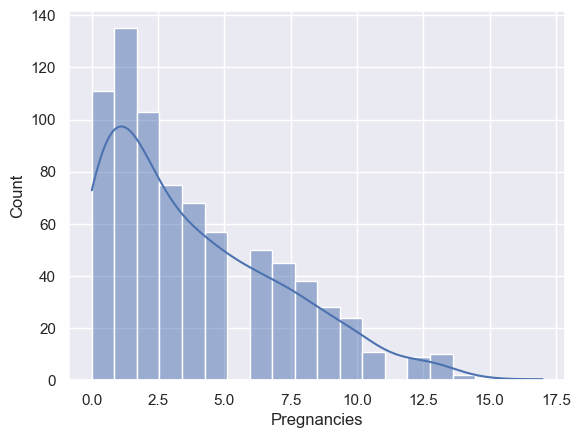

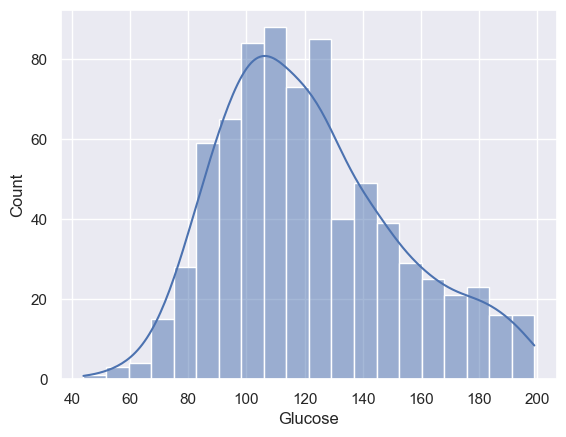

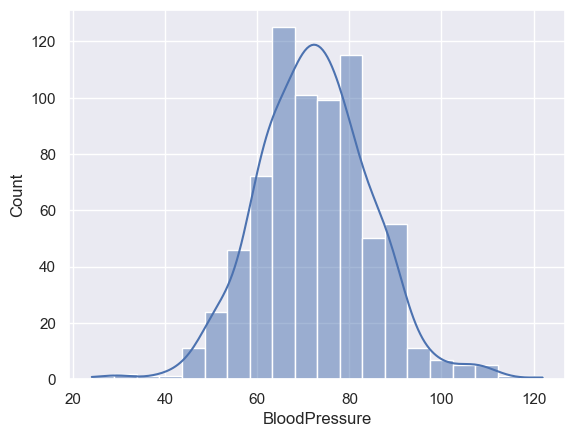

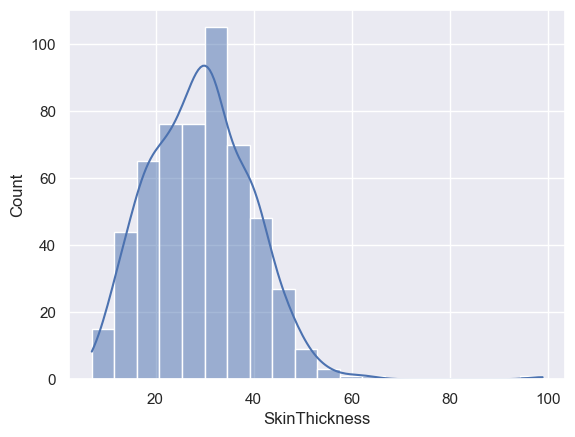

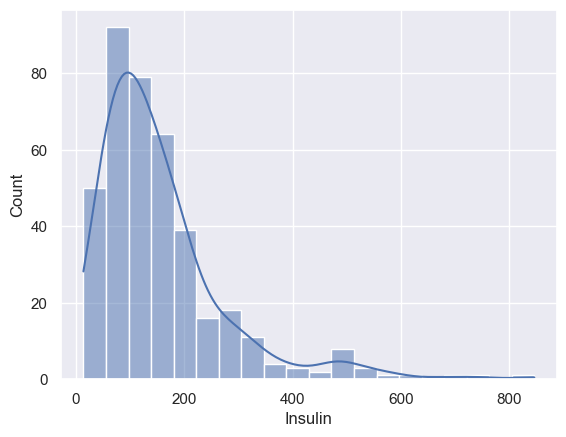

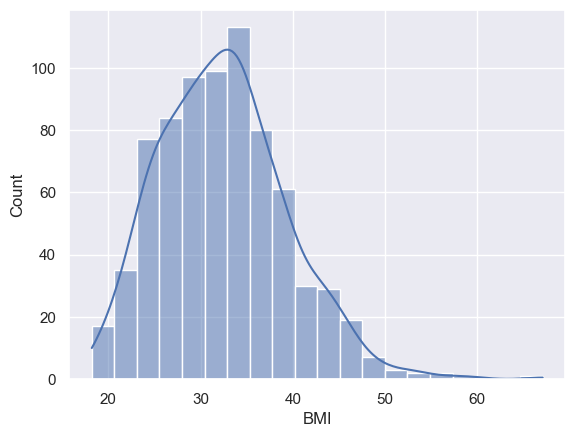

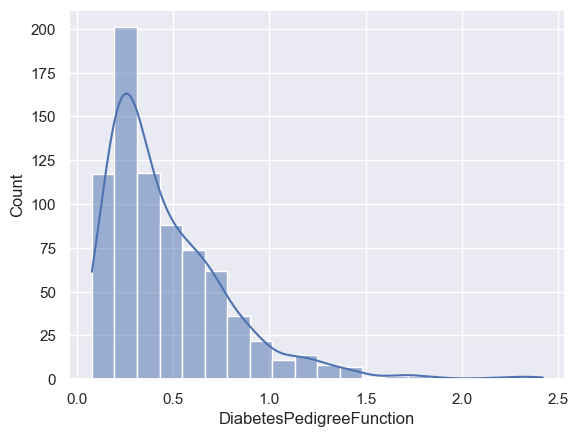

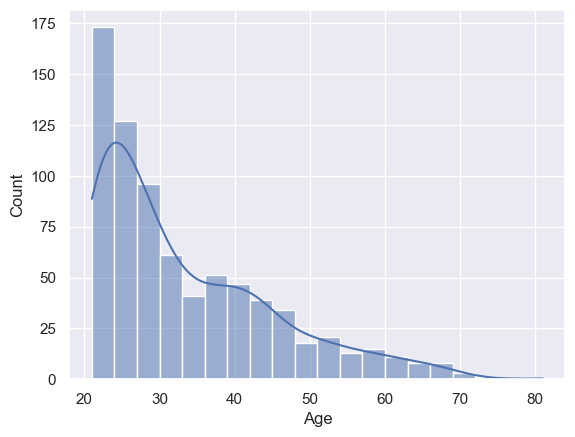

In [238]:
with pd.option_context('mode.use_inf_as_na', True):
    # Suppress FutureWarnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    features = df.columns[df.columns != 'Outcome']
#function to visualize all numeric features except traget feature(outcome) 
    def plot_numerical_column(dataframe, features):
        sns.histplot(data=dataframe[features], kde=True, bins=20)
        plt.xlabel(features)
        plt.show()    
    
    for col in features:
        plot_numerical_column(df, col)

In [239]:
#target analysis (Outcome)
#The dependent variable "outcome" is a categorical variable. It consists of 1s and 0s.
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

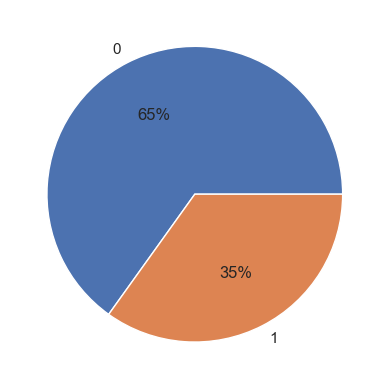

In [240]:
plt.pie(df['Outcome'].value_counts() , autopct='%.0f%%', labels=[0,1])
plt.show()

Target vs Features

In [241]:
def target_vs_feature(dataframe, target, feature):
    print(dataframe.groupby(target).agg({feature: "mean"}), end="\n\n\n")

for feature in features:
    target_vs_feature(df, "Outcome", feature)

         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        110.643863
1        142.319549


         BloodPressure
Outcome               
0            70.877339
1            75.321429


         SkinThickness
Outcome               
0            27.235457
1            33.000000


            Insulin
Outcome            
0        130.287879
1        206.846154


               BMI
Outcome           
0        30.859674
1        35.406767


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164




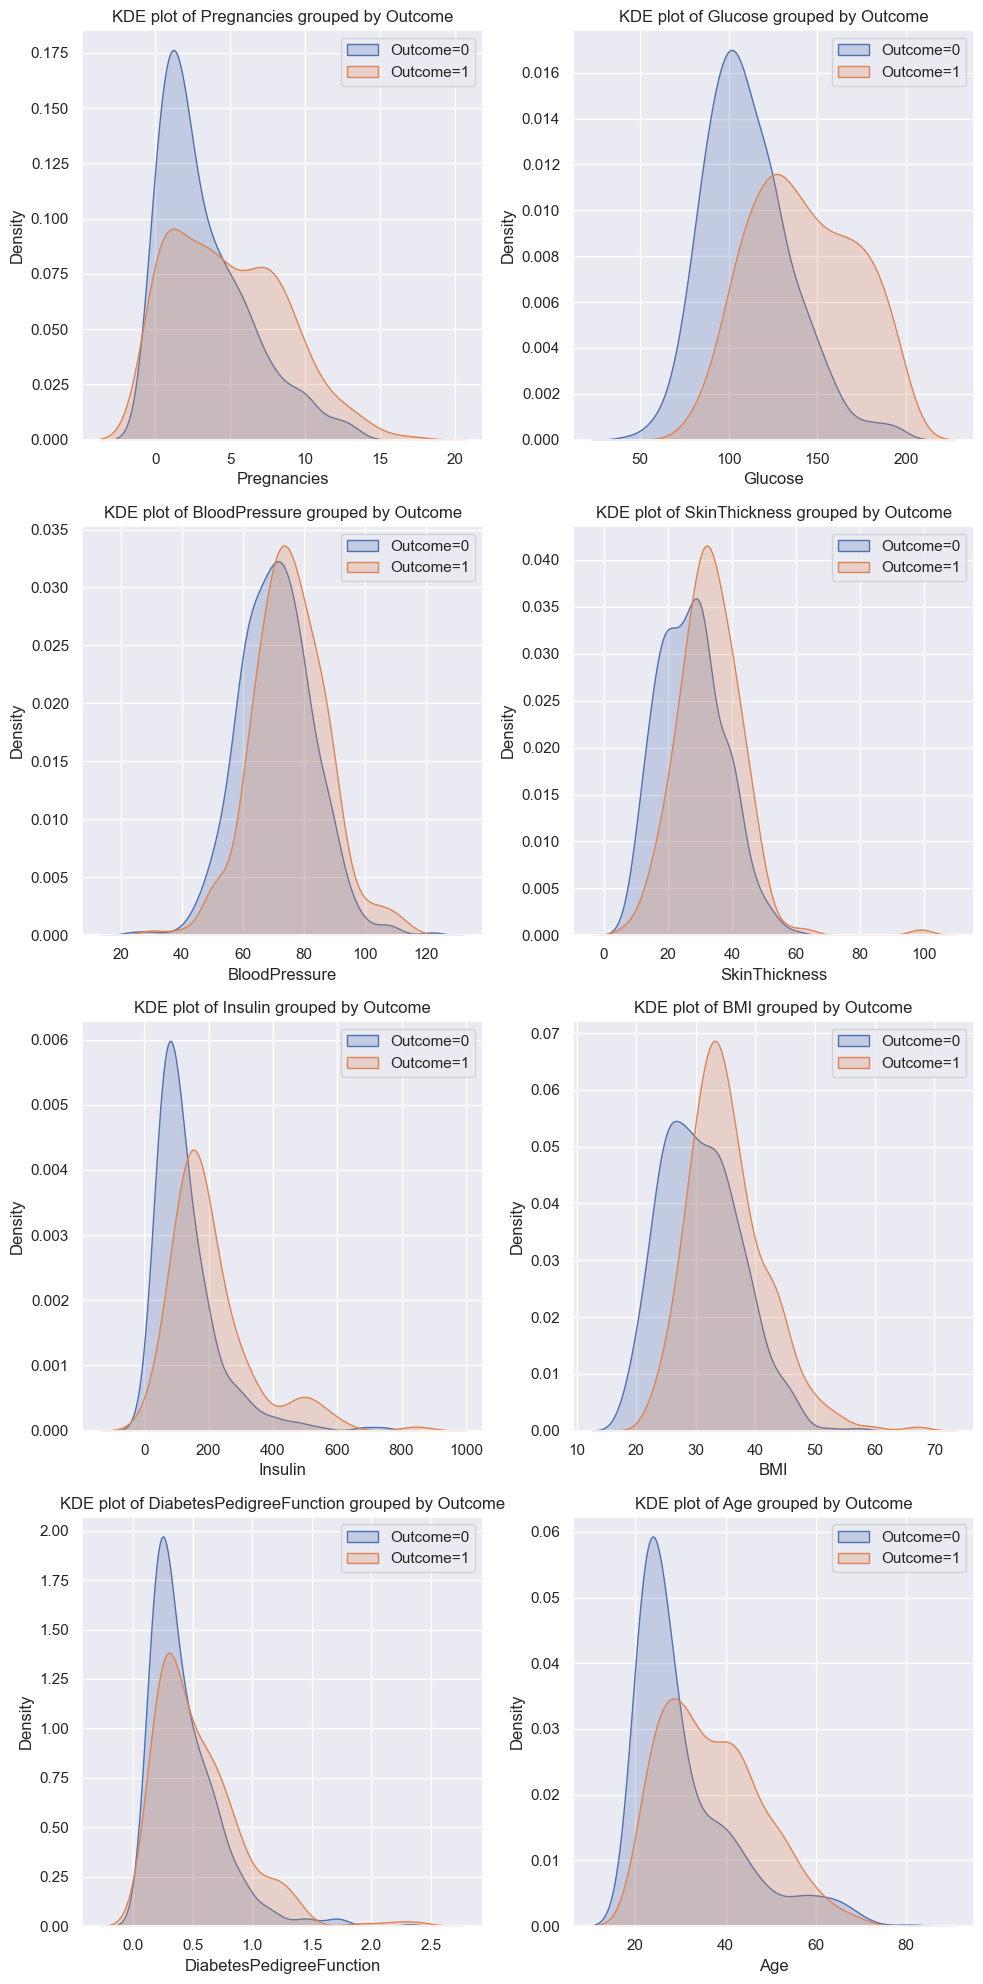

In [242]:
with pd.option_context('mode.use_inf_as_na', True):
    # Suppress FutureWarnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    # KDE plots for each variable grouped by the Outcome
    num_columns = len(df.columns.drop('Outcome'))
    num_rows = (num_columns + 1) // 2

    plt.figure(figsize=(10, 5*num_rows))
    for i, column in enumerate(df.columns.drop('Outcome')):
        plt.subplot(num_rows, 2, i+1)
        sns.kdeplot(data=df[df['Outcome']==0][column], label='Outcome=0', fill=True)
        sns.kdeplot(data=df[df['Outcome']==1][column], label='Outcome=1', fill=True)
        plt.title(f'KDE plot of {column} grouped by Outcome')
        plt.legend()

    plt.tight_layout()
    plt.show()

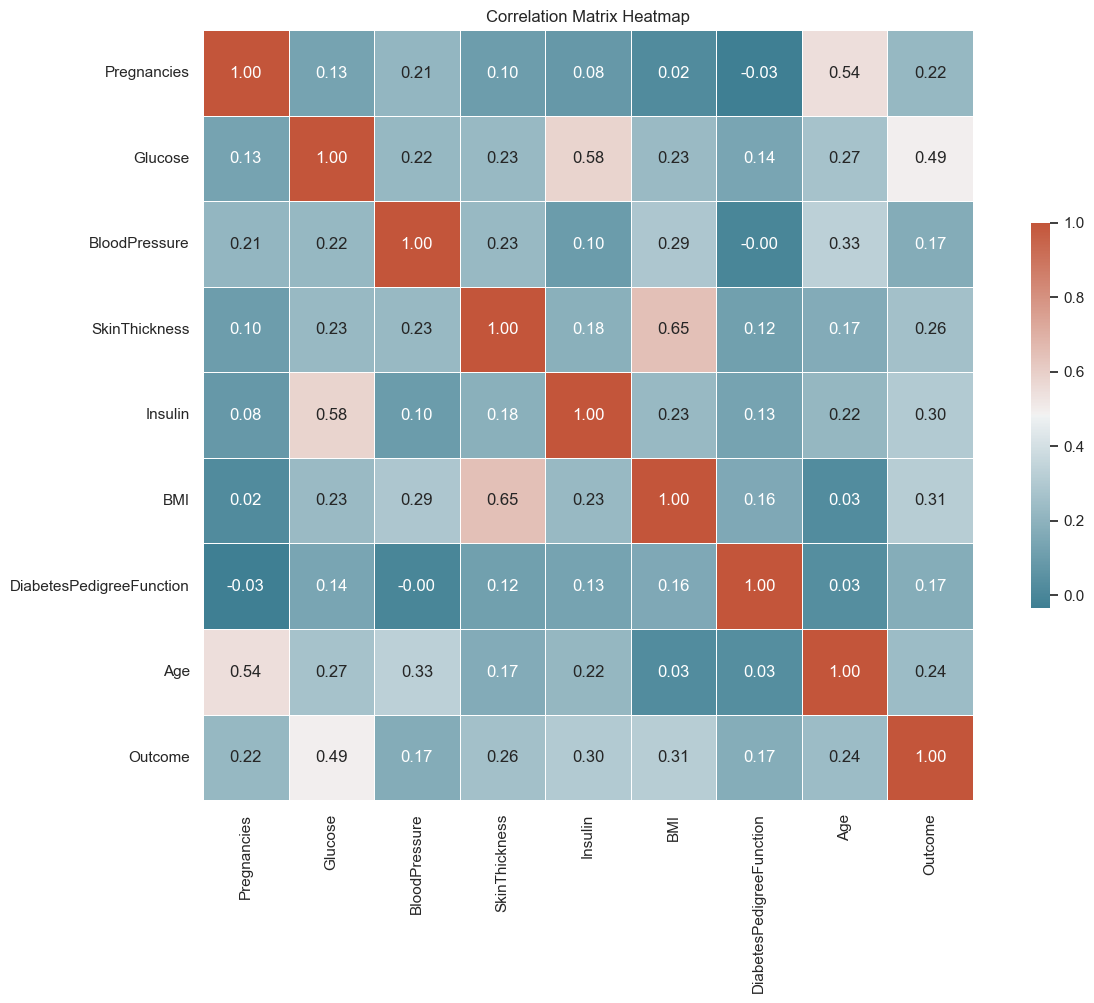

In [243]:
#Corelation between features

corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 20, as_cmap=True),square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix Heatmap")
plt.show()

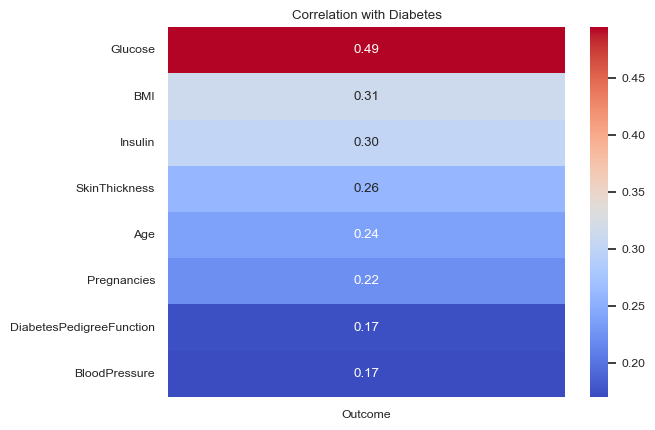

In [244]:
#Feature correlation with target 
corr = df.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

Correlation results suggests that different Features have varying degrees of correlation with Outcome.

Glucose: With a correlation of 0.49, this is the most strongly correlated feature with the outcome. This suggests that higher glucose levels could be a significant indicator of diabetes. 

BMI: This feature has a correlation of 0.31 with the outcome, it is a moderate correlation, suggesting that body mass index could also be an important factor in diabetes. 

Age: Having a correlation of 0.24 with Outcome, it suggests less chances of getting diabetics at the younger age.

Pregnancies: This feature has a correlation of 0.22 with the outcome, suggesting that having more pregnancies may increase the risk of diabetes. 

DiabetesPedigreeFunction: With a correlation of 0.17, this feature has a slight correlation with the outcome. This suggests that genetic influences could play a role in diabetes. 

Insulin: This feature has a correlation of 0.30 with the outcome, it is a moderate correlation, suggesting that insulin levels can help in predicting diabetes. 

SkinThickness: Having correlation of 0.26 with outcome, this suggests that skin thickness may not be a significant factor in diabetes. 

BloodPressure: This feature has the weakest correlation of 0.17 with  outcome. This suggests that blood pressure may not be a significant factor in diabetes. 

Data Pre-processing

In [245]:
#Imputing the missing values(NaN) of features
"""
As Mean is useful when the original data is not skewed,and median is more robust, not sensitive to outliers, and thus used when data is skewed.
From the distribution chart we can see  insulin, glucose and skin thickness are deviated to the right and left, so we fill them with Median.
On the other hand, BMI and blood pressure have a normal distribution and we use the mean value to fill them.
"""
for col in ['Glucose','Insulin','SkinThickness']:
    median_columns = np.median(df[df[col].notna()][col])
    df[col] = df[col].fillna(median_columns)
for col in ['BMI','BloodPressure']:
    mean_columns = np.mean(df[df[col].notna()][col])
    df[col] = df[col].fillna(mean_columns)

In [246]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


Outlier Analysis

In [249]:
#defining function to work around outliers in the dataset 
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * IQR
    low_limit = quartile1 - 1.5 * IQR
    return low_limit, up_limit
    
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
        
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers
    
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit    
        

In [250]:
for col in features:
    print(col, check_outlier(df, col))

Pregnancies True
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


<Axes: >

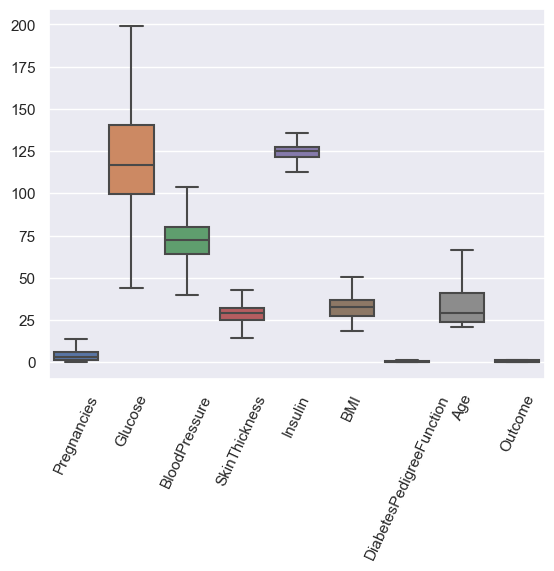

In [253]:
sns.set()
plt.xticks(rotation=65)
sns.boxplot(data=df)

In [254]:
for col in features:
    replace_with_thresholds(df, col)

In [255]:
for col in features:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


<Axes: >

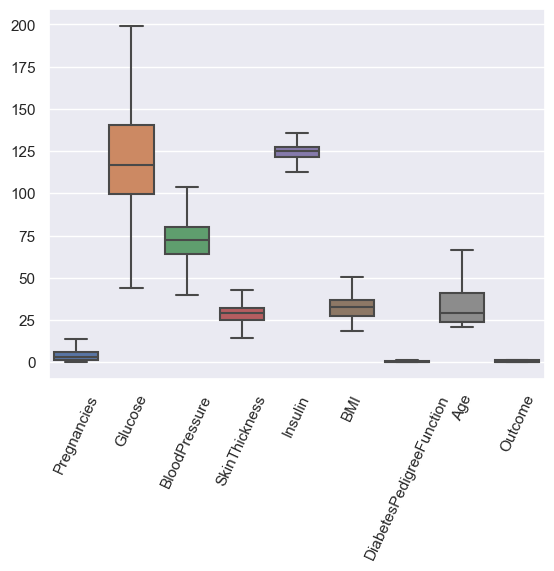

In [155]:
sns.set()
plt.xticks(rotation=65)
sns.boxplot(data=df)

In [256]:
df.shape

(768, 9)

In [257]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1


Fetaure Engineering 

Feature engineering is essential for creating effective and robust machine learning models. It can help you extract relevant information from the data, reduce noise and redundancy, improve computational efficiency, and enhance the interpretability and generalizability of the models

In [258]:
# pregrancy and age cannot be float, it occurs due to calculation of IQR
df["Pregnancies"] = df["Pregnancies"].apply(lambda x: int(x))
df["Age"] = df["Age"].apply(lambda x: int(x))

In [259]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32,1
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21,0
4,0,137.0,40.0,35.0,135.875,43.1,1.200,33,1


In [260]:
df.loc[((df['Glucose'] <= 70)), "NEW_Glucose"] = "low"
df.loc[((df['Glucose'] >70) & (df['Glucose'] <= 100)), "NEW_Glucose"] = "normal"
df.loc[((df['Glucose'] >100) & (df['Glucose'] <= 125)), "NEW_Glucose"] = "prediabetes"
df.loc[((df['Glucose'] >125)), "NEW_Glucose"] = "diabetes"

df["NEW_Glucose"].value_counts()

NEW_Glucose
diabetes       297
prediabetes    262
normal         198
low             11
Name: count, dtype: int64

In [261]:
df.groupby("NEW_Glucose").agg({"Outcome": "mean"})

,Outcome
NEW_Glucose,
diabetes,0.592593
low,0.000000
normal,0.090909
prediabetes,0.282443


In [262]:
df.loc[((df['BMI'] <= 18.5)), "NEW_BMI"] = "underweight"
df.loc[((df['BMI'] >18.5) & (df['BMI'] <= 24.9)), "NEW_BMI"] = "normal"
df.loc[((df['BMI'] >24.9) & (df['BMI'] <= 29.9)), "NEW_BMI"] = "overweight"
df.loc[((df['BMI'] >29.9) & (df['BMI'] <= 34.9)), "NEW_BMI"] = "1 degree obesity"
df.loc[((df['BMI'] >34.9) & (df['BMI'] <= 39.9)), "NEW_BMI"] = "2 degree obesity"
df.loc[((df['BMI'] >39.9)), "NEW_BMI"] = "3 degree obesity"

df["NEW_BMI"].value_counts()

NEW_BMI
1 degree obesity    235
overweight          179
2 degree obesity    150
normal              102
3 degree obesity     98
underweight           4
Name: count, dtype: int64

In [263]:
df.groupby("NEW_BMI").agg({"Outcome": "mean"})

,Outcome
NEW_BMI,
1 degree obesity,0.438298
2 degree obesity,0.420000
3 degree obesity,0.561224
normal,0.068627
overweight,0.223464
underweight,0.000000


In [264]:
df.loc[((df['Age'] >=21) & (df['Age'] < 35)), "NEW_AGE"] = "young age"
df.loc[((df['Age'] >=35) & (df['Age'] < 65)), "NEW_AGE"] = "middle age"
df.loc[((df['Age'] >=65)), "NEW_AGE"] = "old age"

df["NEW_AGE"].value_counts()

NEW_AGE
young age     488
middle age    264
old age        16
Name: count, dtype: int64

In [265]:
df.groupby("NEW_AGE").agg({"Outcome": "mean"})

,Outcome
NEW_AGE,
middle age,0.522727
old age,0.250000
young age,0.258197


In [266]:
df.loc[((df['Insulin'] >=16) & (df['Insulin'] <=166)), "NEW_INSULIN"] = "normal"
df.loc[((df['Insulin'] >166)), "NEW_INSULIN"] = "abnormal"

df["NEW_INSULIN"].value_counts()

NEW_INSULIN
normal    768
Name: count, dtype: int64

In [267]:
df.groupby("NEW_INSULIN").agg({"Outcome": "mean"})

,Outcome
NEW_INSULIN,
normal,0.348958


In [268]:
df.loc[((df['BloodPressure'] <80)) , "NEW_BloodPressure"] = "Normal"
df.loc[((df['BloodPressure'] >=80) & (df['BloodPressure'] < 90)), "NEW_BloodPressure"] = "prehypertension"
df.loc[((df['BloodPressure'] >=90)), "NEW_BloodPressure"] = "hypertension"

df["NEW_BloodPressure"].value_counts()

NEW_BloodPressure
Normal             563
prehypertension    145
hypertension        60
Name: count, dtype: int64

In [269]:
df.groupby("NEW_BloodPressure").agg({"Outcome": "mean"})

,Outcome
NEW_BloodPressure,
Normal,0.316163
hypertension,0.483333
prehypertension,0.420690


In [270]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_Glucose,NEW_BMI,NEW_AGE,NEW_INSULIN,NEW_BloodPressure
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50,1,diabetes,1 degree obesity,middle age,normal,Normal
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31,0,normal,overweight,young age,normal,Normal
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32,1,diabetes,normal,young age,normal,Normal
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21,0,normal,overweight,young age,normal,Normal
4,0,137.0,40.0,35.0,135.875,43.1,1.200,33,1,diabetes,3 degree obesity,young age,normal,Normal


One Hot Encoding

In [271]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return dataframe

one_hot_cols = [col for col in df.columns if 10 >= df[col].nunique() >= 1 and col not in ["Outcome"]]

df = one_hot_encoder(df, one_hot_cols)

In [272]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_Glucose_low,...,NEW_Glucose_prediabetes,NEW_BMI_2 degree obesity,NEW_BMI_3 degree obesity,NEW_BMI_normal,NEW_BMI_overweight,NEW_BMI_underweight,NEW_AGE_old age,NEW_AGE_young age,NEW_BloodPressure_hypertension,NEW_BloodPressure_prehypertension
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31,0,0,...,0,0,0,0,1,0,0,1,0,0
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32,1,0,...,0,0,0,1,0,0,0,1,0,0
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,137.0,40.0,35.0,135.875,43.1,1.200,33,1,0,...,0,0,1,0,0,0,0,1,0,0


In [273]:
df.shape

(768, 21)

Scaling: RobustScale

Scaling the variables so that they have a mean of 0 and a standard deviation of 1


In [274]:
num_cols=df.select_dtypes(include=['float64','int64']).columns.drop('Outcome')

In [277]:
rs = RobustScaler()
for i in num_cols:
    df[i] = rs.fit_transform(df[[i]])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_Glucose_low,...,NEW_Glucose_prediabetes,NEW_BMI_2 degree obesity,NEW_BMI_3 degree obesity,NEW_BMI_normal,NEW_BMI_overweight,NEW_BMI_underweight,NEW_AGE_old age,NEW_AGE_young age,NEW_BloodPressure_hypertension,NEW_BloodPressure_prehypertension
0,0.6,0.765432,-0.012662,0.857143,0.000000,0.131868,0.665359,1.235294,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.4,-0.790123,-0.387662,0.000000,0.000000,-0.637363,-0.056209,0.117647,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1.0,1.629630,-0.512662,0.000000,0.000000,-1.000000,0.783007,0.176471,1,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.4,-0.691358,-0.387662,-0.857143,-2.108696,-0.472527,-0.537255,-0.470588,0,0,...,0,0,0,0,1,0,0,1,0,0
4,-0.6,0.493827,-2.012662,0.857143,1.891304,1.175824,2.163399,0.235294,1,0,...,0,0,1,0,0,0,0,1,0,0


In [281]:
df.to_csv(r'C:\Users\sonia\OneDrive\Desktop\SJSU\Data Visualization\diabetes1.csv', index=False)